In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from surgeon_pytorch import Inspect, get_layers
import os, random, pathlib, warnings, itertools, math
from torchvision.transforms import Resize, ToTensor
from torch.utils.data import DataLoader, Subset
from PIL import Image
from transformers import AutoModel
from torchvision.transforms import functional as TF
from transformers import AutoModel, AutoImageProcessor
from torchvision.transforms import Resize, ToTensor, Compose, ToPILImage

Number of classes: 3
Class names and sample counts: {'square': 10, 'triangle': 10, 'circle': 10}


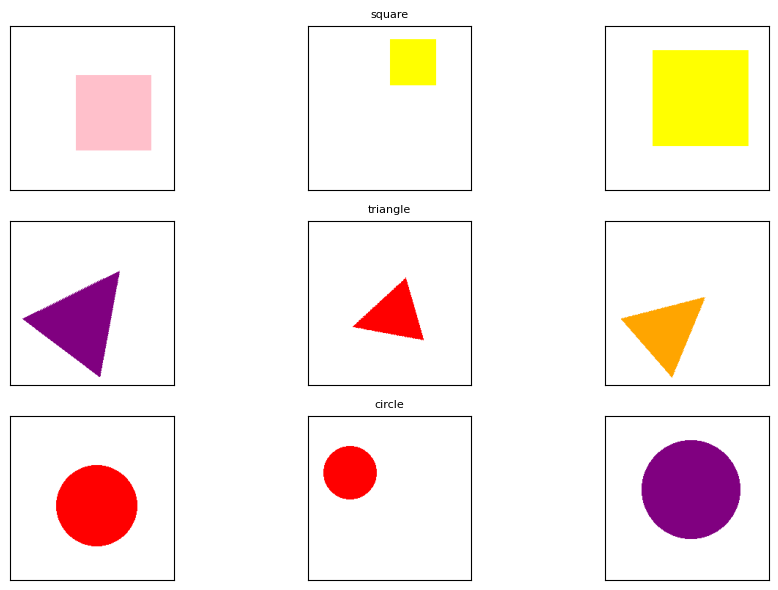

In [2]:
# Path to the dataset
data_path = 'data/'

# Function to count classes and their samples
def count_classes_and_samples(data_path):
    class_counts = {}
    class_names = []

    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            num_samples = len(os.listdir(label_path))
            class_counts[label] = num_samples
            class_names.append(label)

    return class_names, class_counts

# Function to plot minimized class samples
def plot_class_samples(data_path, num_samples=3):
    class_names, class_counts = count_classes_and_samples(data_path)

    print(f"Number of classes: {len(class_names)}")
    print(f"Class names and sample counts: {class_counts}")

    # Adjust figure size for smaller images
    plt.figure(figsize=(10, len(class_names) * 2))

    for idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_path, class_name)
        images = os.listdir(class_path)[:num_samples]

        for i, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            try:
                image = Image.open(image_path).convert("RGB")

                # Subplots with smaller images
                plt.subplot(len(class_names), num_samples, idx * num_samples + i + 1)
                plt.imshow(image)
                plt.xticks([])
                plt.yticks([])
                if i == 1:  # Center the class name over the middle image
                    plt.title(class_name, fontsize=8)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    plt.tight_layout()
    plt.show()

# Execute the plotting function
plot_class_samples(data_path, num_samples=3)


In [4]:
# Path to the dataset
data_dir = 'data/'

# Function to convert dataset images to grayscale
def convert_dataset_to_grayscale(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Open the image
                with Image.open(file_path) as img:
                    # Convert to grayscale
                    gray_img = TF.to_grayscale(img, num_output_channels=3)  # Keeps 3 channels for compatibility

                    # Save the image (overwrite original)
                    gray_img.save(file_path)
                    print(f"Converted: {file_path}")
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Execute the function
convert_dataset_to_grayscale(data_dir)


Converted: data/square/square_10.png
Converted: data/square/square_8.png
Converted: data/square/square_9.png
Converted: data/square/square_2.png
Converted: data/square/square_3.png
Converted: data/square/square_1.png
Converted: data/square/square_4.png
Converted: data/square/square_5.png
Converted: data/square/square_7.png
Converted: data/square/square_6.png
Converted: data/triangle/triangle_1.png
Converted: data/triangle/triangle_3.png
Converted: data/triangle/triangle_2.png
Converted: data/triangle/triangle_6.png
Converted: data/triangle/triangle_7.png
Converted: data/triangle/triangle_5.png
Converted: data/triangle/triangle_4.png
Converted: data/triangle/triangle_9.png
Converted: data/triangle/triangle_8.png
Converted: data/triangle/triangle_10.png
Converted: data/circle/circle_6.png
Converted: data/circle/circle_10.png
Converted: data/circle/circle_7.png
Converted: data/circle/circle_5.png
Converted: data/circle/circle_4.png
Converted: data/circle/circle_1.png
Converted: data/circl

Class: square


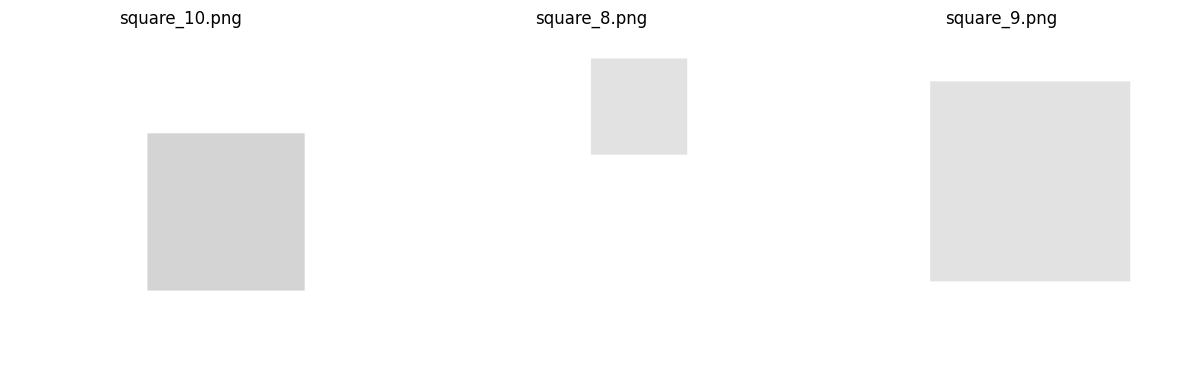

Class: triangle


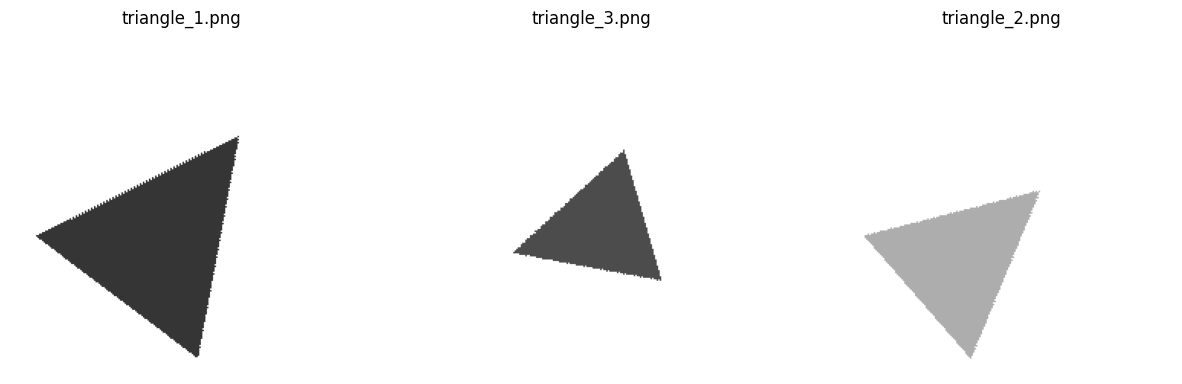

Class: circle


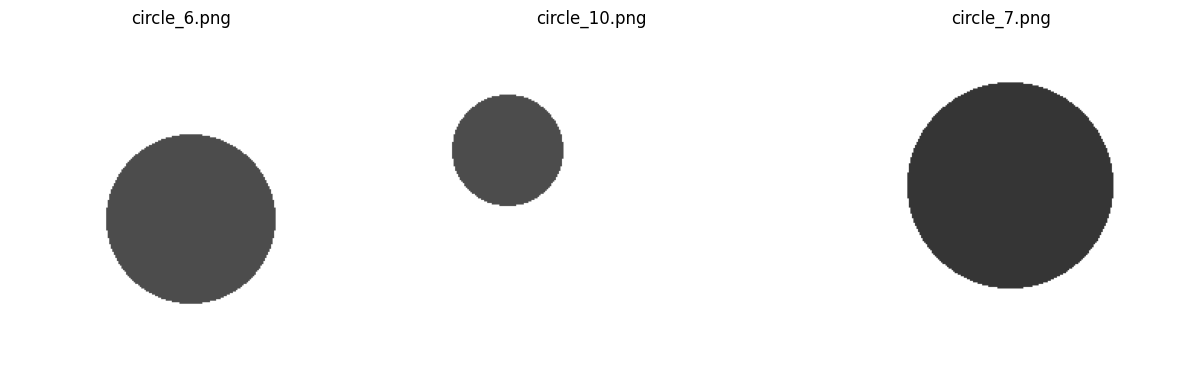

In [5]:
# Path to the dataset
data_dir = 'data/'

# Function to display a few images from each class
def display_sample_images(data_dir, num_samples=3):
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)

        # Skip non-directory files
        if not os.path.isdir(class_path):
            continue

        print(f"Class: {class_name}")
        images = os.listdir(class_path)[:num_samples]  # Select a few images
        plt.figure(figsize=(15, 5))

        for i, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            try:
                img = Image.open(image_path)
                plt.subplot(1, num_samples, i + 1)
                plt.imshow(img, cmap='gray')  # Show in grayscale
                plt.title(image_name)
                plt.axis('off')
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

        plt.show()

# Display images from the dataset
display_sample_images(data_dir, num_samples=3)


In [6]:
from transformers import AutoModel

# Load your model
model_name = "facebook/dinov2-large"
model = AutoModel.from_pretrained(model_name)

# Print all layer names
for name, module in model.named_modules():
    print(name)


config.json:   0%|          | 0.00/549 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]


embeddings
embeddings.patch_embeddings
embeddings.patch_embeddings.projection
embeddings.dropout
encoder
encoder.layer
encoder.layer.0
encoder.layer.0.norm1
encoder.layer.0.attention
encoder.layer.0.attention.attention
encoder.layer.0.attention.attention.query
encoder.layer.0.attention.attention.key
encoder.layer.0.attention.attention.value
encoder.layer.0.attention.attention.dropout
encoder.layer.0.attention.output
encoder.layer.0.attention.output.dense
encoder.layer.0.attention.output.dropout
encoder.layer.0.layer_scale1
encoder.layer.0.drop_path
encoder.layer.0.norm2
encoder.layer.0.mlp
encoder.layer.0.mlp.fc1
encoder.layer.0.mlp.activation
encoder.layer.0.mlp.fc2
encoder.layer.0.layer_scale2
encoder.layer.1
encoder.layer.1.norm1
encoder.layer.1.attention
encoder.layer.1.attention.attention
encoder.layer.1.attention.attention.query
encoder.layer.1.attention.attention.key
encoder.layer.1.attention.attention.value
encoder.layer.1.attention.attention.dropout
encoder.layer.1.attention.

**facebook/dinov2-large**

The Vision Transformer (ViT) is a transformer encoder model (BERT-like) pretrained on a large collection of images in a self-supervised fashion.

**Note** that this model does not include any fine-tuned heads.

[https://huggingface.co/facebook/dinov2-large-imagenet1k-1-layer]

In [8]:
# Load the pretrained DINOv2 model
model_name = "facebook/dinov2-large"
model = AutoModel.from_pretrained(model_name)  # Load the model
model.eval()  # Set the model to evaluation mode

# Print the model structure to explore layer names
print(model)


Dinov2Model(
  (embeddings): Dinov2Embeddings(
    (patch_embeddings): Dinov2PatchEmbeddings(
      (projection): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Dinov2Encoder(
    (layer): ModuleList(
      (0-23): 24 x Dinov2Layer(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attention): Dinov2SdpaAttention(
          (attention): Dinov2SdpaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): Dinov2SelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (layer_scale1): Dinov2LayerScale()
      

**Pipeline**

In [9]:
# Function to extract, visualize, save, and show combined latent representations
def extract_visualize_save_and_show_tsne(model, feature_extractor, images, layer_names, num_classes, save_path="tsne_plots.png"):

    import numpy as np
    import torch
    from torch.utils.data import DataLoader
    from torchvision.transforms import ToPILImage
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE

    all_activations = []  # Combined activations across layers
    all_labels = []  # Ground truth labels
    all_images = []  # To track image names
    layer_labels = []  # To track the layer index of each activation

    # DataLoader for batch processing
    data_loader = DataLoader(images, batch_size=32, shuffle=False)
    to_pil = ToPILImage()  # Convert tensors back to PIL images

    # Forward hooks to capture activations from specific layers
    hooks = []

    # Hook function to handle tuple outputs and flatten activations
    def create_hook(layer_name, layer_idx):
        def hook_fn(module, input, output):
            if isinstance(output, tuple):
                output = output[0]  # Use the first element if it's a tuple
            flat_output = output.view(output.size(0), -1)  # Flatten spatial dimensions
            all_activations.append(flat_output.detach().cpu().numpy())  # Append activations
            layer_labels.extend([layer_idx] * flat_output.size(0))  # Track which layer the activations belong to
        return hook_fn

    # Attach hooks to the specified layers
    for idx, layer_name in enumerate(layer_names):
        try:
            layer = dict([*model.named_modules()])[layer_name]
            hooks.append(layer.register_forward_hook(create_hook(layer_name, idx)))
        except KeyError:
            print(f"Layer {layer_name} not found. Check the model structure:")
            for name, _ in model.named_modules():
                print(name)
            return

    # Process the data
    for batch_idx, (batch, target) in enumerate(data_loader):
        pil_images = [to_pil(img) for img in batch]  # Convert tensors back to PIL images
        image_names = [images.imgs[idx][0] for idx in range(len(all_images), len(all_images) + len(batch))]
        all_images.extend(image_names)  # Save image names

        with torch.no_grad():
            inputs = feature_extractor(images=pil_images, return_tensors="pt")["pixel_values"]
            inputs = inputs.to("cuda" if torch.cuda.is_available() else "cpu")
            model(inputs)

            # Expand class labels for each layer
            repeated_labels = np.tile(target.numpy(), len(layer_names))
            all_labels.extend(repeated_labels)

    # Remove hooks after processing
    for hook in hooks:
        hook.remove()

    # Concatenate activations and labels
    all_activations = np.concatenate(all_activations, axis=0)
    all_labels = np.array(all_labels)  # Convert list to NumPy array
    layer_labels = np.array(layer_labels)

    # Save data for later use
    np.save("activations.npy", all_activations)
    np.save("labels.npy", all_labels)
    np.save("image_names.npy", np.array(all_images))

    # Apply T-SNE to combined activations
    tsne = TSNE(n_components=2, perplexity=min(30, len(all_labels) - 1), random_state=0)
    reduced_activations = tsne.fit_transform(all_activations)

    # Create side-by-side plots for classes and layers
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot T-SNE by classes
    class_colors = ['lightblue', 'red', 'black']  # Define custom colors for classes
    scatter_classes = axes[0].scatter(
        reduced_activations[:, 0],
        reduced_activations[:, 1],
        c=[class_colors[label % len(class_colors)] for label in all_labels],
        alpha=0.7,
        s=10
    )
    axes[0].set_title('T-SNE Visualization by Class')
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')

    # Plot T-SNE by layers with single numbers
    unique_layers = np.unique(layer_labels)
    cmap = plt.get_cmap('tab10')  # Use a colormap for layers

    for i, layer_idx in enumerate(unique_layers):
        layer_mask = layer_labels == layer_idx
        layer_points = reduced_activations[layer_mask]
        axes[1].scatter(
            layer_points[:, 0],
            layer_points[:, 1],
            label=f'{layer_names[layer_idx]}',
            alpha=0.7,
            s=10
        )
        # Calculate the centroid for this layer
        centroid_x, centroid_y = layer_points.mean(axis=0)
        axes[1].text(
            centroid_x,
            centroid_y,
            str(layer_idx),
            fontsize=12,
            color='darkgreen',
            fontweight='bold'
        )

    axes[1].set_title('T-SNE Visualization by Layer')
    axes[1].set_xlabel('Component 1')
    axes[1].set_ylabel('Component 2')
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)  # Move legend to the side

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Save with high resolution (300 DPI)
    plt.show()  # Show the plot
    plt.close()  # Close the plot



**Model1: facebook/dinov2-large-imagenet**

In [18]:
from transformers import AutoModel

# Load your model
model_name = "facebook/dinov2-large"
model = AutoModel.from_pretrained(model_name)
print (model)
# Print all layer names
for name, module in model.named_modules():
    print(name)


Dinov2Model(
  (embeddings): Dinov2Embeddings(
    (patch_embeddings): Dinov2PatchEmbeddings(
      (projection): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Dinov2Encoder(
    (layer): ModuleList(
      (0-23): 24 x Dinov2Layer(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attention): Dinov2SdpaAttention(
          (attention): Dinov2SdpaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): Dinov2SelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (layer_scale1): Dinov2LayerScale()
      

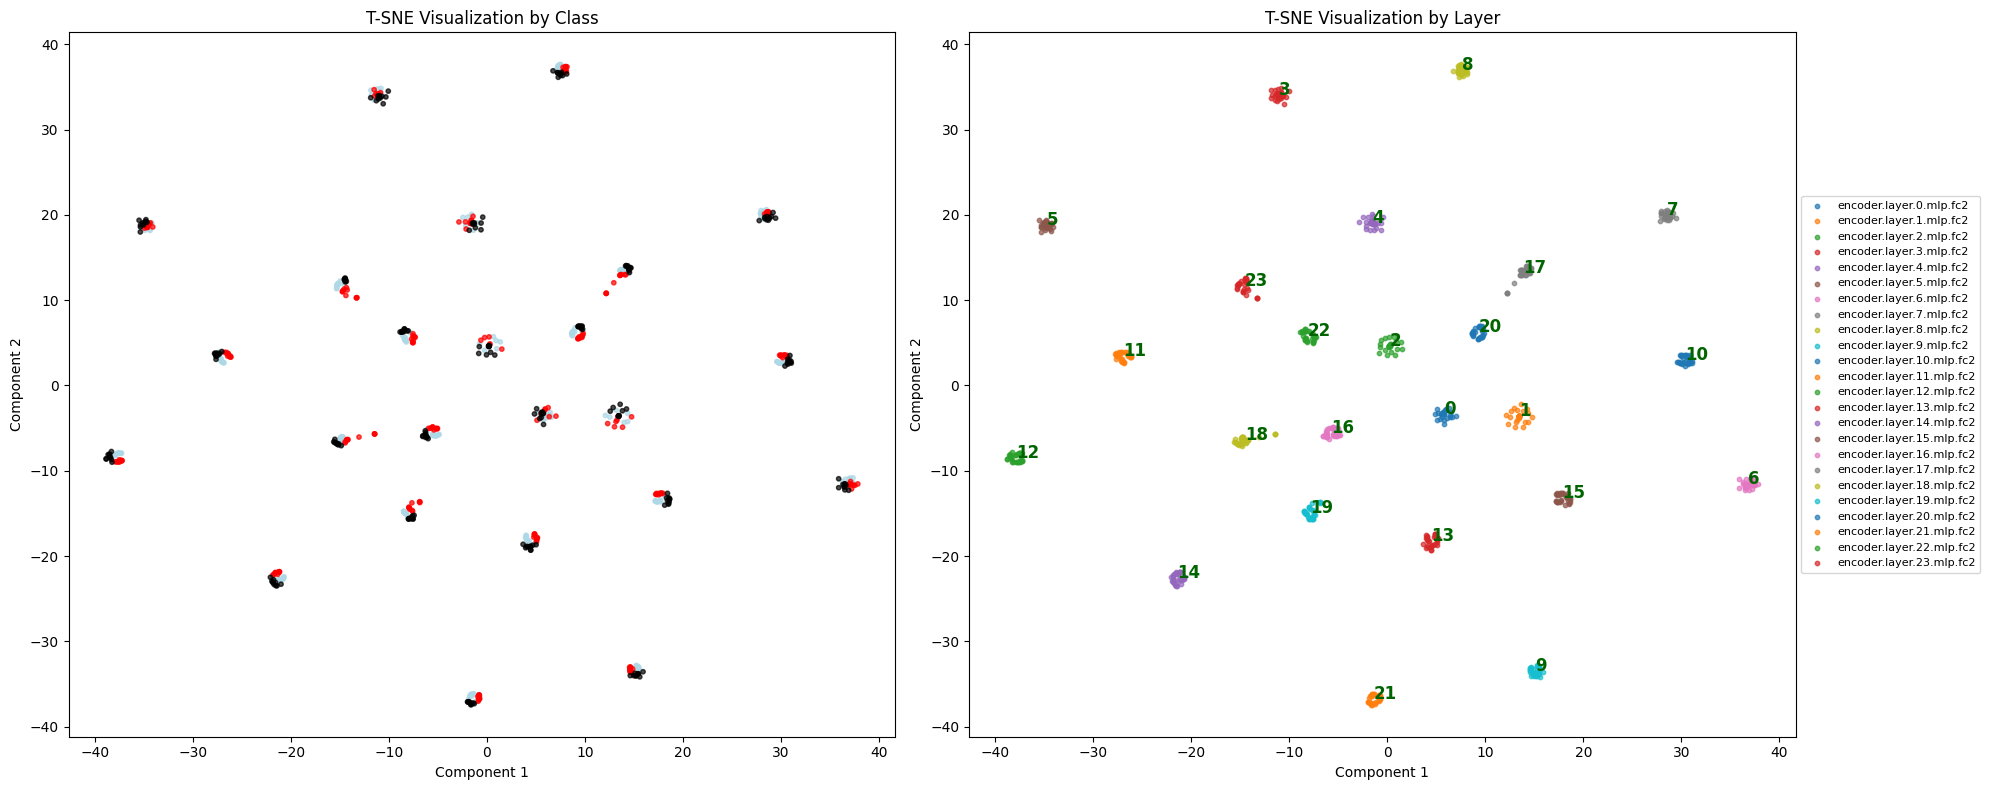

In [19]:
# Load the DINOv2 model and feature extractor
model_name = "facebook/dinov2-large-imagenet1k-1-layer"
model = AutoModel.from_pretrained(model_name)

# Suppress uninitialized pooler weights warning
if hasattr(model, 'pooler'):
    model.pooler = None  # Remove the pooler layer if it exists

feature_extractor = AutoImageProcessor.from_pretrained(model_name)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "data/"
transform = Compose([
    Resize((224, 224)),  # Update resolution based on model requirements
    ToTensor(),  # Keep data in [0, 1] range
])
dataset = ImageFolder(data_dir, transform=transform)

# Define the MLP layers to analyze
layers_to_analyze_vit = [
    "encoder.layer.0.mlp.fc2",  # Output of the 1st encoder block
    "encoder.layer.1.mlp.fc2",  # Output of the 2nd encoder block
    "encoder.layer.2.mlp.fc2",  # Output of the 3rd encoder block
    "encoder.layer.3.mlp.fc2",  # Output of the 4th encoder block
    "encoder.layer.4.mlp.fc2",  # Output of the 5th encoder block
    "encoder.layer.5.mlp.fc2",  # Output of the 6th encoder block
    "encoder.layer.6.mlp.fc2",  # Output of the 7th encoder block
    "encoder.layer.7.mlp.fc2",  # Output of the 8th encoder block
    "encoder.layer.8.mlp.fc2",  # Output of the 9th encoder block
    "encoder.layer.9.mlp.fc2",  # Output of the 10th encoder block
    "encoder.layer.10.mlp.fc2", # Output of the 11th encoder block
    "encoder.layer.11.mlp.fc2", # Output of the 12th encoder block
    "encoder.layer.12.mlp.fc2", # Output of the 13th encoder block
    "encoder.layer.13.mlp.fc2", # Output of the 14th encoder block
    "encoder.layer.14.mlp.fc2", # Output of the 15th encoder block
    "encoder.layer.15.mlp.fc2", # Output of the 16th encoder block
    "encoder.layer.16.mlp.fc2", # Output of the 17th encoder block
    "encoder.layer.17.mlp.fc2", # Output of the 18th encoder block
    "encoder.layer.18.mlp.fc2", # Output of the 19th encoder block
    "encoder.layer.19.mlp.fc2", # Output of the 20th encoder block
    "encoder.layer.20.mlp.fc2", # Output of the 21st encoder block
    "encoder.layer.21.mlp.fc2", # Output of the 22nd encoder block
    "encoder.layer.22.mlp.fc2", # Output of the 23rd encoder block
    "encoder.layer.23.mlp.fc2"  # Output of the 24th encoder block
]

# Extract and visualize combined latent representations
extract_visualize_save_and_show_tsne(model, feature_extractor, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes))

**Model2: microsoft/beit-large-patch16-512**

In [13]:

# Load the model and feature extractor
model_name = "microsoft/beit-large-patch16-512"
model = AutoModel.from_pretrained(model_name)

# Suppress uninitialized pooler weights warning
if hasattr(model, 'pooler'):
   model.pooler = None

feature_extractor = AutoImageProcessor.from_pretrained(model_name)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "/content/sample_data/shapes"
transform = Compose([
    Resize((512, 512)),  # Resize to model's input size
    ToTensor(),  # Convert image to PyTorch tensor
])
dataset = ImageFolder(data_dir, transform=transform)

# Debug the transformation
def debug_transform(dataset, feature_extractor):
    for img, label in dataset:
        print(f"Original Image Shape: {img.size}")
        inputs = feature_extractor(images=[img.permute(1, 2, 0).numpy()], return_tensors="pt")["pixel_values"]
        print(f"Processed Image Shape: {inputs.shape}")
        break

debug_transform(dataset, feature_extractor)

# Define the layers to analyze
layers_to_analyze_vit = [
    "encoder.layer.0.output.dense",
    "encoder.layer.1.output.dense",
    "encoder.layer.2.output.dense",
    "encoder.layer.3.output.dense",
    "encoder.layer.4.output.dense",
    "encoder.layer.5.output.dense",
    "encoder.layer.6.output.dense",
    "encoder.layer.7.output.dense",
    "encoder.layer.8.output.dense",
    "encoder.layer.9.output.dense",
    "encoder.layer.10.output.dense",
    "encoder.layer.11.output.dense",
    "encoder.layer.12.output.dense",
    "encoder.layer.13.output.dense",
    "encoder.layer.14.output.dense",
    "encoder.layer.15.output.dense",
    "encoder.layer.16.output.dense",
    "encoder.layer.17.output.dense",
    "encoder.layer.18.output.dense",
    "encoder.layer.19.output.dense",
    "encoder.layer.20.output.dense",
    "encoder.layer.21.output.dense",
    "encoder.layer.22.output.dense",
    "encoder.layer.23.output.dense"
]

# Extract and visualize T-SNE maps for both classes and layers
extract_visualize_save_and_show_tsne(model, feature_extractor, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes))


config.json:   0%|          | 0.00/69.9k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/shapes'

In [ ]:
from transformers import AutoModel

# Load your model
model_name = "microsoft/beit-large-patch16-512"
model = AutoModel.from_pretrained(model_name)

# Print all layer names
for name, module in model.named_modules():
    print(name)


In [ ]:
from transformers import AutoModel

# Load the pretrained DINOv2 model
model_name = "microsoft/beit-large-patch16-512"
model = AutoModel.from_pretrained(model_name)  # Load the model
model.eval()  # Set the model to evaluation mode

# Print the model structure to explore layer names
print(model)


**Model3: timm/vit_large_patch16_224.augreg_in21k**

---



In [14]:
import timm

# Load the model
model_name = "vit_large_patch16_224.augreg_in21k"
model = timm.create_model(model_name, pretrained=True)

# Print all layer names
for name, module in model.named_modules():
    print(name)


model.safetensors:   0%|          | 0.00/1.30G [00:00<?, ?B/s]


patch_embed
patch_embed.proj
patch_embed.norm
pos_drop
patch_drop
norm_pre
blocks
blocks.0
blocks.0.norm1
blocks.0.attn
blocks.0.attn.qkv
blocks.0.attn.q_norm
blocks.0.attn.k_norm
blocks.0.attn.attn_drop
blocks.0.attn.proj
blocks.0.attn.proj_drop
blocks.0.ls1
blocks.0.drop_path1
blocks.0.norm2
blocks.0.mlp
blocks.0.mlp.fc1
blocks.0.mlp.act
blocks.0.mlp.drop1
blocks.0.mlp.norm
blocks.0.mlp.fc2
blocks.0.mlp.drop2
blocks.0.ls2
blocks.0.drop_path2
blocks.1
blocks.1.norm1
blocks.1.attn
blocks.1.attn.qkv
blocks.1.attn.q_norm
blocks.1.attn.k_norm
blocks.1.attn.attn_drop
blocks.1.attn.proj
blocks.1.attn.proj_drop
blocks.1.ls1
blocks.1.drop_path1
blocks.1.norm2
blocks.1.mlp
blocks.1.mlp.fc1
blocks.1.mlp.act
blocks.1.mlp.drop1
blocks.1.mlp.norm
blocks.1.mlp.fc2
blocks.1.mlp.drop2
blocks.1.ls2
blocks.1.drop_path2
blocks.2
blocks.2.norm1
blocks.2.attn
blocks.2.attn.qkv
blocks.2.attn.q_norm
blocks.2.attn.k_norm
blocks.2.attn.attn_drop
blocks.2.attn.proj
blocks.2.attn.proj_drop
blocks.2.ls1
blocks.

In [15]:
from timm import create_model
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, ToTensor, Compose
from sklearn.manifold import TSNE
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Function to extract and visualize combined latent representations
def extract_and_visualize_combined_latent_representations(model, images, layer_names, num_classes):
    all_activations = []  # Combined activations across layers
    all_labels = []  # Ground truth labels
    all_images = []  # To track image names
    layer_labels = []  # To track the layer index of each activation

    # DataLoader for batch processing
    data_loader = DataLoader(images, batch_size=32, shuffle=False)

    # Forward hooks to capture activations from specific layers
    hooks = []

    # Hook function to handle tuple outputs and flatten activations
    def create_hook(layer_name, layer_idx):
        def hook_fn(module, input, output):
            if isinstance(output, tuple):
                output = output[0]  # Use the first element if it's a tuple
            flat_output = output.view(output.size(0), -1)  # Flatten spatial dimensions
            all_activations.append(flat_output.detach().cpu().numpy())  # Append activations
            layer_labels.extend([layer_idx] * flat_output.size(0))  # Track which layer the activations belong to
        return hook_fn

    # Attach hooks to the specified layers
    for idx, layer_name in enumerate(layer_names):
        layer = dict([*model.named_modules()])[layer_name]
        hooks.append(layer.register_forward_hook(create_hook(layer_name, idx)))

    # Process the data
    for batch_idx, (batch, target) in enumerate(data_loader):
        image_names = [images.imgs[idx][0] for idx in range(len(all_images), len(all_images) + len(batch))]
        all_images.extend(image_names)  # Save image names

        with torch.no_grad():
            inputs = batch.to("cuda" if torch.cuda.is_available() else "cpu")
            model(inputs)
            repeated_labels = np.tile(target.numpy(), len(layer_names))  # Expand class labels for each layer
            all_labels.extend(repeated_labels)

    # Remove hooks after processing
    for hook in hooks:
        hook.remove()

    # Concatenate activations and labels
    all_activations = np.concatenate(all_activations, axis=0)
    all_labels = np.array(all_labels)  # Convert list to NumPy array
    layer_labels = np.array(layer_labels)

    # Save data for later use
    np.save("activations.npy", all_activations)
    np.save("labels.npy", all_labels)
    np.save("image_names.npy", np.array(all_images))

    # Apply T-SNE to combined activations
    tsne = TSNE(n_components=2, perplexity=min(30, len(all_labels) - 1), random_state=0)
    reduced_activations = tsne.fit_transform(all_activations)

    # Create side-by-side plots for classes and layers
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot T-SNE by classes
    scatter_classes = axes[0].scatter(
        reduced_activations[:, 0],
        reduced_activations[:, 1],
        c=all_labels,
        cmap='coolwarm',  # Adjusted to show light blue, red, and black
        alpha=0.7,
        s=10
    )
    axes[0].set_title('T-SNE Visualization by Class')
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')
    fig.colorbar(scatter_classes, ax=axes[0], ticks=range(num_classes), label='Classes')

    # Plot T-SNE by layers
    unique_layers = np.unique(layer_labels)
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i / len(unique_layers)) for i in range(len(unique_layers))]

    for i, layer_idx in enumerate(unique_layers):
        layer_mask = layer_labels == layer_idx
        axes[1].scatter(
            reduced_activations[layer_mask, 0],
            reduced_activations[layer_mask, 1],
            c=[colors[layer_idx]],
            alpha=0.7,
            s=10
        )

    axes[1].set_title('T-SNE Visualization by Layer')
    axes[1].set_xlabel('Component 1')
    axes[1].set_ylabel('Component 2')

    # Move legend to the side of the plot
    axes[1].legend(
        [f"{layer_names[layer_idx]}" for layer_idx in unique_layers],
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=8,
        title="Layers"
    )

    plt.tight_layout()

    # Save and display the plot
    plt.savefig("tsne_visualization.png", dpi=300)  # Save high-resolution plot
    plt.show()

# Load the timm model
model_name = "vit_large_patch16_224.augreg_in21k"
model = create_model(model_name, pretrained=True)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "/content/sample_data/shapes"
transform = Compose([
    Resize((224, 224)),  # Resize to match model input size
    ToTensor(),  # Convert image to PyTorch tensor
])
dataset = ImageFolder(data_dir, transform=transform)

# Define the layers to analyze
# Update these based on the model's architecture
layers_to_analyze_vit = [
    "blocks.0.mlp.fc2",
    "blocks.1.mlp.fc2",
    "blocks.2.mlp.fc2",
    "blocks.3.mlp.fc2",
    "blocks.4.mlp.fc2",
    "blocks.5.mlp.fc2",
    "blocks.6.mlp.fc2",
    "blocks.7.mlp.fc2",
    "blocks.8.mlp.fc2",
    "blocks.9.mlp.fc2",
    "blocks.10.mlp.fc2",
    "blocks.11.mlp.fc2",
    "blocks.12.mlp.fc2",
    "blocks.13.mlp.fc2",
    "blocks.14.mlp.fc2",
    "blocks.15.mlp.fc2",
    "blocks.16.mlp.fc2",
    "blocks.17.mlp.fc2",
    "blocks.18.mlp.fc2",
    "blocks.19.mlp.fc2",
    "blocks.20.mlp.fc2",
    "blocks.21.mlp.fc2",
    "blocks.22.mlp.fc2",
    "blocks.23.mlp.fc2"
]

# Extract and visualize combined latent representations
extract_and_visualize_combined_latent_representations(
    model, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes)
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/shapes'

In [17]:
from timm import create_model
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, ToTensor, Compose
from sklearn.manifold import TSNE
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Function to extract and visualize combined latent representations
def extract_and_visualize_combined_latent_representations(model, images, layer_names, num_classes):
    all_activations = []  # Combined activations across layers
    all_labels = []  # Ground truth labels
    all_images = []  # To track image names
    layer_labels = []  # To track the layer index of each activation

    # DataLoader for batch processing
    data_loader = DataLoader(images, batch_size=32, shuffle=False)

    # Forward hooks to capture activations from specific layers
    hooks = []

    # Hook function to handle tuple outputs and flatten activations
    def create_hook(layer_name, layer_idx):
        def hook_fn(module, input, output):
            if isinstance(output, tuple):
                output = output[0]  # Use the first element if it's a tuple
            flat_output = output.view(output.size(0), -1)  # Flatten spatial dimensions
            all_activations.append(flat_output.detach().cpu().numpy())  # Append activations
            layer_labels.extend([layer_idx] * flat_output.size(0))  # Track which layer the activations belong to
        return hook_fn

    # Attach hooks to the specified layers
    for idx, layer_name in enumerate(layer_names):
        layer = dict([*model.named_modules()])[layer_name]
        hooks.append(layer.register_forward_hook(create_hook(layer_name, idx)))

    # Process the data
    for batch_idx, (batch, target) in enumerate(data_loader):
        image_names = [images.imgs[idx][0] for idx in range(len(all_images), len(all_images) + len(batch))]
        all_images.extend(image_names)  # Save image names

        with torch.no_grad():
            inputs = batch.to("cuda" if torch.cuda.is_available() else "cpu")
            model(inputs)
            repeated_labels = np.tile(target.numpy(), len(layer_names))  # Expand class labels for each layer
            all_labels.extend(repeated_labels)

    # Remove hooks after processing
    for hook in hooks:
        hook.remove()

    # Concatenate activations and labels
    all_activations = np.concatenate(all_activations, axis=0)
    all_labels = np.array(all_labels)  # Convert list to NumPy array
    layer_labels = np.array(layer_labels)

    # Save data for later use
    np.save("activations.npy", all_activations)
    np.save("labels.npy", all_labels)
    np.save("image_names.npy", np.array(all_images))

    # Apply T-SNE to combined activations
    tsne = TSNE(n_components=2, perplexity=min(30, len(all_labels) - 1), random_state=0)
    reduced_activations = tsne.fit_transform(all_activations)

    # Create side-by-side plots for classes and layers
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot T-SNE by classes
    scatter_classes = axes[0].scatter(
        reduced_activations[:, 0],
        reduced_activations[:, 1],
        c=all_labels,
        cmap='coolwarm',  # Adjusted to show light blue, red, and black
        alpha=0.7,
        s=10
    )
    axes[0].set_title('T-SNE Visualization by Class')
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')
    fig.colorbar(scatter_classes, ax=axes[0], ticks=range(num_classes), label='Classes')

    # Plot T-SNE by layers
    unique_layers = np.unique(layer_labels)
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i / len(unique_layers)) for i in range(len(unique_layers))]

    for i, layer_idx in enumerate(unique_layers):
        layer_mask = layer_labels == layer_idx
        axes[1].scatter(
            reduced_activations[layer_mask, 0],
            reduced_activations[layer_mask, 1],
            c=[colors[layer_idx]],
            alpha=0.7,
            s=10
        )

    axes[1].set_title('T-SNE Visualization by Layer')
    axes[1].set_xlabel('Component 1')
    axes[1].set_ylabel('Component 2')

    # Move legend to the side of the plot
    axes[1].legend(
        [f"{layer_names[layer_idx]}" for layer_idx in unique_layers],
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=8,
        title="Layers"
    )

    plt.tight_layout()

    # Save and display the plot
    plt.savefig("tsne_visualization.png", dpi=300)  # Save high-resolution plot
    plt.show()

# Load the timm model
model_name = "vit_large_patch16_224.augreg_in21k"
model = timm.create_model(model_name, pretrained=True)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "/content/sample_data/shapes"
transform = Compose([
    Resize((224, 224)),  # Resize to match model input size
    ToTensor(),  # Convert image to PyTorch tensor
])
dataset = ImageFolder(data_dir, transform=transform)

# Define the layers to analyze
# Update these based on the model's architecture
layers_to_analyze_vit = [
    "blocks.0.mlp.fc2",
    "blocks.1.mlp.fc2",
    "blocks.2.mlp.fc2",
    "blocks.3.mlp.fc2",
    "blocks.4.mlp.fc2",
    "blocks.5.mlp.fc2",
    "blocks.6.mlp.fc2",
    "blocks.7.mlp.fc2",
    "blocks.8.mlp.fc2",
    "blocks.9.mlp.fc2",
    "blocks.10.mlp.fc2",
    "blocks.11.mlp.fc2",
    "blocks.12.mlp.fc2",
    "blocks.13.mlp.fc2",
    "blocks.14.mlp.fc2",
    "blocks.15.mlp.fc2",
    "blocks.16.mlp.fc2",
    "blocks.17.mlp.fc2",
    "blocks.18.mlp.fc2",
    "blocks.19.mlp.fc2",
    "blocks.20.mlp.fc2",
    "blocks.21.mlp.fc2",
    "blocks.22.mlp.fc2",
    "blocks.23.mlp.fc2"
]

# Extract and visualize combined latent representations
extract_and_visualize_combined_latent_representations(
    model, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes)
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/shapes'

In [ ]:
# Function to extract and visualize combined latent representations
def extract_and_visualize_combined_latent_representations(model, images, layer_names, num_classes):
    all_activations = []  # Combined activations across layers
    all_labels = []  # Ground truth labels
    all_images = []  # To track image names
    layer_labels = []  # To track the layer index of each activation

    # DataLoader for batch processing
    data_loader = DataLoader(images, batch_size=32, shuffle=False)

    # Forward hooks to capture activations from specific layers
    hooks = []

    # Hook function to handle tuple outputs and flatten activations
    def create_hook(layer_name, layer_idx):
        def hook_fn(module, input, output):
            if isinstance(output, tuple):
                output = output[0]  # Use the first element if it's a tuple
            flat_output = output.view(output.size(0), -1)  # Flatten spatial dimensions
            all_activations.append(flat_output.detach().cpu().numpy())  # Append activations
            layer_labels.extend([layer_idx] * flat_output.size(0))  # Track which layer the activations belong to
        return hook_fn

    # Attach hooks to the specified layers
    for idx, layer_name in enumerate(layer_names):
        layer = dict([*model.named_modules()])[layer_name]
        hooks.append(layer.register_forward_hook(create_hook(layer_name, idx)))

    # Process the data
    for batch_idx, (batch, target) in enumerate(data_loader):
        image_names = [images.imgs[idx][0] for idx in range(len(all_images), len(all_images) + len(batch))]
        all_images.extend(image_names)  # Save image names

        with torch.no_grad():
            inputs = batch.to("cuda" if torch.cuda.is_available() else "cpu")
            model(inputs)
            repeated_labels = np.tile(target.numpy(), len(layer_names))  # Expand class labels for each layer
            all_labels.extend(repeated_labels)

    # Remove hooks after processing
    for hook in hooks:
        hook.remove()

    # Concatenate activations and labels
    all_activations = np.concatenate(all_activations, axis=0)
    all_labels = np.array(all_labels)  # Convert list to NumPy array
    layer_labels = np.array(layer_labels)

    # Save data for later use
    np.save("activations.npy", all_activations)
    np.save("labels.npy", all_labels)
    np.save("image_names.npy", np.array(all_images))

    # Apply T-SNE to combined activations
    tsne = TSNE(n_components=2, perplexity=min(30, len(all_labels) - 1), random_state=0)
    reduced_activations = tsne.fit_transform(all_activations)

    # Create side-by-side plots for classes and layers
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot T-SNE by classes
    scatter_classes = axes[0].scatter(
        reduced_activations[:, 0],
        reduced_activations[:, 1],
        c=all_labels,
        cmap='coolwarm',  # Adjusted to show light blue, red, and black
        alpha=0.7,
        s=10
    )
    axes[0].set_title('T-SNE Visualization by Class')
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')
    fig.colorbar(scatter_classes, ax=axes[0], ticks=range(num_classes), label='Classes')

    # Plot T-SNE by layers
    unique_layers = np.unique(layer_labels)
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i / len(unique_layers)) for i in range(len(unique_layers))]

    for i, layer_idx in enumerate(unique_layers):
        layer_mask = layer_labels == layer_idx
        layer_points = reduced_activations[layer_mask]

        # Scatter points for each layer
        axes[1].scatter(
            layer_points[:, 0],
            layer_points[:, 1],
            c=[colors[layer_idx]],
            alpha=0.7,
            s=10
        )

        # Calculate the centroid for this layer
        centroid_x, centroid_y = layer_points.mean(axis=0)

        # Annotate the plot with the layer number
        axes[1].text(
            centroid_x,
            centroid_y,
            str(layer_idx),
            fontsize=12,
            color='darkgreen',
            fontweight='bold',
            ha='center',
            va='center'
        )

    axes[1].set_title('T-SNE Visualization by Layer')
    axes[1].set_xlabel('Component 1')
    axes[1].set_ylabel('Component 2')

    # Move legend to the side of the plot
    axes[1].legend(
        [f"{layer_names[layer_idx]}" for layer_idx in unique_layers],
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=8,
        title="Layers"
    )

    plt.tight_layout()

    # Save and display the plot
    plt.savefig("tsne_visualization.png", dpi=300)  # Save high-resolution plot
    plt.show()

# Load the timm model
model_name = "vit_large_patch16_224.augreg_in21k"
model = timm.create_model(model_name, pretrained=True)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "/content/sample_data/shapes"
transform = Compose([
    Resize((224, 224)),  # Resize to match model input size
    ToTensor(),  # Convert image to PyTorch tensor
])
dataset = ImageFolder(data_dir, transform=transform)

# Define the layers to analyze
layers_to_analyze_vit = [
    "blocks.0.mlp.fc2",
    "blocks.1.mlp.fc2",
    "blocks.2.mlp.fc2",
    "blocks.3.mlp.fc2",
    "blocks.4.mlp.fc2",
    "blocks.5.mlp.fc2",
    "blocks.6.mlp.fc2",
    "blocks.7.mlp.fc2",
    "blocks.8.mlp.fc2",
    "blocks.9.mlp.fc2",
    "blocks.10.mlp.fc2",
    "blocks.11.mlp.fc2",
    "blocks.12.mlp.fc2",
    "blocks.13.mlp.fc2",
    "blocks.14.mlp.fc2",
    "blocks.15.mlp.fc2",
    "blocks.16.mlp.fc2",
    "blocks.17.mlp.fc2",
    "blocks.18.mlp.fc2",
    "blocks.19.mlp.fc2",
    "blocks.20.mlp.fc2",
    "blocks.21.mlp.fc2",
    "blocks.22.mlp.fc2",
    "blocks.23.mlp.fc2"
]

# Extract and visualize combined latent representations
extract_and_visualize_combined_latent_representations(
    model, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes)
)


**Model4: google/vit-large-patch16-224**

In [ ]:

# Load the model and feature extractor
model_name = "google/vit-large-patch16-224"
model = AutoModel.from_pretrained(model_name)

# Suppress uninitialized pooler weights warning
if hasattr(model, 'pooler'):
    model.pooler = None

feature_extractor = AutoImageProcessor.from_pretrained(model_name)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "/content/sample_data/shapes"
transform = Compose([
    Resize((224, 224)),  # Resize to model's input size
    ToTensor(),  # Convert image to PyTorch tensor
])
dataset = ImageFolder(data_dir, transform=transform)

# Define the layers to analyze
layers_to_analyze_vit = [
    "encoder.layer.0.output.dense",
    "encoder.layer.1.output.dense",
    "encoder.layer.2.output.dense",
    "encoder.layer.3.output.dense",
    "encoder.layer.4.output.dense",
    "encoder.layer.5.output.dense",
    "encoder.layer.6.output.dense",
    "encoder.layer.7.output.dense",
    "encoder.layer.8.output.dense",
    "encoder.layer.9.output.dense",
    "encoder.layer.10.output.dense",
    "encoder.layer.11.output.dense",
    "encoder.layer.12.output.dense",
    "encoder.layer.13.output.dense",
    "encoder.layer.14.output.dense",
    "encoder.layer.15.output.dense",
    "encoder.layer.16.output.dense",
    "encoder.layer.17.output.dense",
    "encoder.layer.18.output.dense",
    "encoder.layer.19.output.dense",
    "encoder.layer.20.output.dense",
    "encoder.layer.21.output.dense",
    "encoder.layer.22.output.dense",
    "encoder.layer.23.output.dense"
]

# Extract and visualize T-SNE maps for both classes and layers
extract_visualize_save_and_show_tsne(model, feature_extractor, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes))

In [ ]:
from transformers import AutoModel

# Load your model
model_name = "google/vit-large-patch16-224"
model = AutoModel.from_pretrained(model_name)
print (model)
# Print all layer names
for name, module in model.named_modules():
    print(name)


**Model5: facebook/vit-mae-large**

In [ ]:
from transformers import AutoModel, AutoImageProcessor
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, ToTensor, Compose

# Load the model and feature extractor
model_name = "facebook/vit-mae-large"
model = AutoModel.from_pretrained(model_name)

# Suppress uninitialized pooler weights warning
if hasattr(model, 'pooler'):
    model.pooler = None

feature_extractor = AutoImageProcessor.from_pretrained(model_name)

# Move the model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device).eval()

# Define the dataset
data_dir = "/content/sample_data/shapes"
transform = Compose([
    Resize((224, 224)),  # Resize to model's input size
    ToTensor(),  # Convert image to PyTorch tensor
])
dataset = ImageFolder(data_dir, transform=transform)

# Debug the transformation
def debug_transform(dataset, feature_extractor):
    for img, label in dataset:
        print(f"Original Image Shape: {img.size()}")
        inputs = feature_extractor(images=[img.permute(1, 2, 0).numpy()], return_tensors="pt")["pixel_values"]
        print(f"Processed Image Shape: {inputs.shape}")
        break

debug_transform(dataset, feature_extractor)

# Define the layers to analyze
layers_to_analyze_vit = [
    "encoder.layer.0.output.dense",
    "encoder.layer.1.output.dense",
    "encoder.layer.2.output.dense",
    "encoder.layer.3.output.dense",
    "encoder.layer.4.output.dense",
    "encoder.layer.5.output.dense",
    "encoder.layer.6.output.dense",
    "encoder.layer.7.output.dense",
    "encoder.layer.8.output.dense",
    "encoder.layer.9.output.dense",
    "encoder.layer.10.output.dense",
    "encoder.layer.11.output.dense",
    "encoder.layer.12.output.dense",
    "encoder.layer.13.output.dense",
    "encoder.layer.14.output.dense",
    "encoder.layer.15.output.dense",
    "encoder.layer.16.output.dense",
    "encoder.layer.17.output.dense",
    "encoder.layer.18.output.dense",
    "encoder.layer.19.output.dense",
    "encoder.layer.20.output.dense",
    "encoder.layer.21.output.dense",
    "encoder.layer.22.output.dense",
    "encoder.layer.23.output.dense"
]

# Extract and visualize T-SNE maps for both classes and layers
extract_visualize_save_and_show_tsne(model, feature_extractor, dataset, layers_to_analyze_vit, num_classes=len(dataset.classes))


In [16]:
from transformers import AutoModel

# Load your model
model_name = "facebook/vit-mae-large"
model = AutoModel.from_pretrained(model_name)
print (model)
# Print all layer names
for name, module in model.named_modules():
    print(name)


config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.32G [00:00<?, ?B/s]

ViTMAEModel(
  (embeddings): ViTMAEEmbeddings(
    (patch_embeddings): ViTMAEPatchEmbeddings(
      (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
  )
  (encoder): ViTMAEEncoder(
    (layer): ModuleList(
      (0-23): 24 x ViTMAELayer(
        (attention): ViTMAESdpaAttention(
          (attention): ViTMAESdpaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTMAESelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTMAEIntermediate(
          (dense): Linear(in_features=1024, out_features=4096, bias=True)
          (intermediate_act_fn): GELUActivation(

=============================================

==========================================

==========================================

Yue

In [ ]:
! pip install surgeon-pytorch

download data

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
#from surgeon_pytorch import Inspect, get_layers
import os, random, pathlib, warnings, itertools, math
from torchvision.transforms import Resize, ToTensor
from torch.utils.data import DataLoader, Subset
from PIL import Image
from transformers import ViTModel, ViTImageProcessor
from transformers import AutoModel, AutoFeatureExtractor
import seaborn as sns





In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khalidboussaroual/2d-geometric-shapes-17-shapes")

print("Path to dataset files:", path)

100%|██████████| 770M/770M [00:39<00:00, 20.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/khalidboussaroual/2d-geometric-shapes-17-shapes/versions/4


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the `kaggle.json` file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuezhanghec","key":"1068353a38ff870573154c2348bf6435"}'}

In [ ]:
# Setup Kaggle authentication
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d khalidboussaroual/2d-geometric-shapes-17-shapes -p /content/data --unzip
#!kaggle datasets download -d misrakahmed/vegetable-image-dataset -p /content/data --unzip
# Update path to account for extra 'data' folder
#data_path = '/content/data/data'

Dataset URL: https://www.kaggle.com/datasets/khalidboussaroual/2d-geometric-shapes-17-shapes
License(s): MIT
100% 767M/770M [00:36<00:00, 23.5MB/s]
100% 770M/770M [00:36<00:00, 22.2MB/s]


In [ ]:
data_dir = '/content/data/2D_Geometric_Shapes_Dataset'
categories = os.listdir(data_dir)
categories

['nonagon',
 'rhombus',
 'square',
 'octagon',
 'circle',
 'pentagon',
 'parallelogram',
 'semicircle',
 'kite',
 'triangle',
 'trapezoid',
 'rectangle',
 'star',
 'heptagon',
 'oval',
 'hexagon',
 'decagon']

Define function

In [ ]:
def visualize_latent_representations_with_tsne(model, data_loader, layers, num_classes=3):
    # Create empty lists to store activations
    all_activations = []
    all_labels = []
    layer_labels = []  # To keep track of which layer the activations come from

    # DataLoader for batch processing
    #data_loader = DataLoader(images, batch_size=32, shuffle=False)

    for batch, target in data_loader:
        print('batch')
        with torch.no_grad():
            for idx, layer in enumerate(layers):
                print('layer')
                model_wrapped = Inspect(model, layer=layer, keep_output=False)
                activations = model_wrapped(batch)
                activations = activations.view(len(activations), -1)
                all_activations.append(activations.cpu().numpy())
                all_labels.append(target.cpu().numpy())
                layer_labels.extend([idx] * len(activations))  # Assign the layer index to each activation

    # Concatenate all activations and labels
    activations = np.concatenate(all_activations, axis=0)
    labels = np.concatenate(all_labels, axis=0)
    layer_labels = np.array(layer_labels)

    # Apply T-SNE
    tsne = TSNE(n_components=2, random_state=0)
    reduced_activations = tsne.fit_transform(activations)

    # Plot T-SNE results
    plt.figure(figsize=(12, 10))
    unique_layers = np.unique(layer_labels)
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i / len(unique_layers)) for i in range(len(unique_layers))]

    for i, layer in enumerate(unique_layers):
        layer_mask = layer_labels == layer
        plt.scatter(reduced_activations[layer_mask, 0], reduced_activations[layer_mask, 1],
                    c=[colors[layer]], label=f'Layer {layers[layer]}', alpha=0.7, s=10)

    plt.colorbar(label='Layers')
    plt.title('T-SNE Visualization of Latent Representations')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()



def visualize_latent_representations_with_tsne_class(model, data_loader, layers, num_classes=3):
    # Create empty lists to store activations
    all_activations = []
    all_labels = []

    # DataLoader for batch processing
    #data_loader = DataLoader(images, batch_size=32, shuffle=False)

    for batch, target in data_loader:
        print('batch')
        with torch.no_grad():
            for layer in layers:
                print('layer')
                model_wrapped = Inspect(model, layer=layer, keep_output=False)
                activations = model_wrapped(batch)
                activations = activations.view(len(activations), -1)
                all_activations.append(activations.cpu().numpy())
                all_labels.append(target.cpu().numpy())

    # Concatenate all activations and labels
    activations = np.concatenate(all_activations, axis=0)
    labels = np.concatenate(all_labels, axis=0)

    # Apply T-SNE
    tsne = TSNE(n_components=2, random_state=0)
    reduced_activations = tsne.fit_transform(activations)

    # Plot T-SNE results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_activations[:, 0], reduced_activations[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, ticks=range(num_classes), label='Classes')
    plt.title('T-SNE Visualization of Latent Representations')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# define CKA
def center_gram(gram):
    """Center a gram matrix."""
    if isinstance(gram, torch.Tensor):
        gram = gram.numpy()  # Convert to NumPy

    n = gram.shape[0]
    unit = np.ones((n, n))
    identity = np.eye(n)
    return gram - unit @ gram / n - gram @ unit / n + unit @ gram @ unit / (n * n)

def linear_CKA(X, Y):
    """Compute linear CKA similarity between two matrices X and Y."""
    # Center the gram matrices
    X_centered = center_gram(X @ X.T)
    Y_centered = center_gram(Y @ Y.T)

    # Compute the CKA similarity
    numerator = np.trace(X_centered @ Y_centered)
    denominator = np.sqrt(np.trace(X_centered @ X_centered) * np.trace(Y_centered @ Y_centered))
    return numerator / denominator if denominator != 0 else 0


# Define a function to process a batch
def collate_fn(batch):
    images, labels = zip(*batch)
    # get image name
    image_names = [os.path.basename(img_path) for img_path in images]
    # Preprocess images using ViTImageProcessor
    pixel_values = processor(images=[Image.open(img).convert("RGB") for img in images], return_tensors="pt")

    #images = [processor(image, return_tensors="pt")["pixel_values"] for image in images]
    # Concatenate into a single tensor
    #images = torch.cat(images, dim=0)

    #return images, torch.tensor(labels), image_names
    return pixel_values["pixel_values"], torch.tensor(labels)


# Extract Representations from Selected Layers
def extract_representations(model, layers, dataloader):
    layer_outputs = {layer: [] for layer in layers}

    def hook_fn(module, input, output):
        layer_outputs[module.name].append(output.detach())

    hooks = []
    for name, module in model.named_modules():
        if name in layers:
            module.name = name
            hooks.append(module.register_forward_hook(hook_fn))

    # Pass data through the model
    for batch in dataloader:

        images, labels = batch
        with torch.no_grad():

            _ = model(images)

    # Aggregate results and remove hooks
    for hook in hooks:
        hook.remove()

    return {layer: torch.cat(layer_outputs[layer]) for layer in layers}

Data preparation

In [ ]:
from PIL import Image
from transformers import ViTModel, ViTImageProcessor
from transformers import AutoModel

# Prepare dataset
result = ['square', 'circle', 'triangle']
data = []
labels = []

for class_idx, category in enumerate(result):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):

        selected_images = [
            os.path.join(category_path, img)
            for img in os.listdir(category_path)
            if img.endswith((".png", ".jpg", ".jpeg")) and
               any(img.endswith(f"_{i}.{ext}") for i in range(1, 11) for ext in ["png", "jpg", "jpeg"])
        ]

        #selected_images = image_files[:num_images_per_class]
        data.extend(selected_images)
        labels.extend([class_idx] * len(selected_images))


# Wrap data into a PyTorch Dataset
dataset = list(zip(data, labels))



In [ ]:
data

['/content/data/2D_Geometric_Shapes_Dataset/square/square_2.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_6.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_10.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_7.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_5.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_8.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_3.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_4.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_1.png',
 '/content/data/2D_Geometric_Shapes_Dataset/square/square_9.png',
 '/content/data/2D_Geometric_Shapes_Dataset/circle/circle_4.png',
 '/content/data/2D_Geometric_Shapes_Dataset/circle/circle_7.png',
 '/content/data/2D_Geometric_Shapes_Dataset/circle/circle_10.png',
 '/content/data/2D_Geometric_Shapes_Dataset/circle/circle_8.png',
 '/content/data/2D_Geometric_Shapes_Dataset/circle/circle_5.png',
 '/conte

**CKA analysis in model**

for model  ["google/vit-large-patch16-224",
              "facebook/vit-mae-large", "microsoft/beit-large-patch16-512"]

In [ ]:
model_names = ["google/vit-large-patch16-224",
              "facebook/vit-mae-large", "microsoft/beit-large-patch16-512"]

cka_similarities = []

for n in range(3):
# step 1: Initialize ViT Image Processor
  model_name = model_names[n]  # supervised learning
  processor = ViTImageProcessor.from_pretrained(model_name)

# step 2: Create DataLoader
  dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Step 3: Load the Vision Transformer model
  model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
  model.eval()

# step 4. Define layers to analyze
  layers_to_analyze = [f'encoder.layer.{i}.output.dense' for i in range(1, 24)]
  #layers_to_analyze = [f'encoder.layer.{i}.mlp.fc2' for i in range(1, 24)]

# step 5. Extract Representations from Selected Layers
  representations = extract_representations(model, layers_to_analyze, dataloader)

# Step 6: Compute CKA for Layer Representations
  layer_keys = list(representations.keys())
  n_layers = len(layer_keys)
  cka_similarity = torch.zeros((n_layers, n_layers))

  for i in range(n_layers):
    for j in range(n_layers):
        X = representations[layer_keys[i]].view(representations[layer_keys[i]].shape[0], -1)
        Y = representations[layer_keys[j]].view(representations[layer_keys[j]].shape[0], -1)
        cka = linear_CKA(X, Y)
        cka_similarity[i, j] = cka

  cka_similarities.append(cka_similarity)




Some weights of ViTModel were not initialized from the model checkpoint at google/vit-large-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


for model facebook/dinov2-large-imagenet1k-1-layer

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader, Subset

# Define transformations
transform = Compose([
    Resize((224, 224)),  # Resize to model input size
    ToTensor(),          # Convert image to tensor
])

# Load the dataset using ImageFolder
dataset_fordino = ImageFolder(root=data_dir, transform=transform)

# Get class-to-index mapping
class_to_idx = dataset_fordino.class_to_idx

# Filter dataset for specific classes
filtered_indices = []
for target_class in result:
    class_index = class_to_idx[target_class]
    # Get all indices for the selected class
    class_indices = [i for i, (_, label) in enumerate(dataset) if label == class_index]
    # Take only the first 10 images for this class
    filtered_indices.extend(class_indices[:10])

# Create a subset of the dataset
filtered_dataset = Subset(dataset_fordino, filtered_indices)

# Create DataLoader
dataloader_fordino = DataLoader(filtered_dataset, batch_size=8, shuffle=True)

model_name = "facebook/dinov2-large-imagenet1k-1-layer"  # supervised learning

# Step 3: Load the Vision Transformer model
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
model.eval()

# step 4. Define layers to analyze
layers_to_analyze = [f'encoder.layer.{i}.mlp.fc2' for i in range(1, 24)]
# step 5. Extract Representations from Selected Layers
representations = extract_representations(model, layers_to_analyze, dataloader_fordino)

# Step 6: Compute CKA for Layer Representations
layer_keys = list(representations.keys())
n_layers = len(layer_keys)
cka_similarity = torch.zeros((n_layers, n_layers))

for i in range(n_layers):
   for j in range(n_layers):
        X = representations[layer_keys[i]].view(representations[layer_keys[i]].shape[0], -1)
        Y = representations[layer_keys[j]].view(representations[layer_keys[j]].shape[0], -1)
        cka = linear_CKA(X, Y)
        cka_similarity[i, j] = cka

cka_similarities.append(cka_similarity)


In [ ]:
len(cka_similarities)

4

"vit_large_patch16_224.augreg_in21k"

In [ ]:
pip install timm

In [ ]:
import timm
from torchvision.datasets import ImageFolder
from torchvision.transforms import Resize, ToTensor, Compose
from sklearn.manifold import TSNE
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

model_name = "vit_large_patch16_224.augreg_in21k"
model = timm.create_model(model_name, pretrained=True)
model.eval()

# Define the dataset
transform = Compose([
    Resize((224, 224)),  # Resize to match model input size
    ToTensor(),  # Convert image to PyTorch tensor
])
# Load the dataset using ImageFolder
dataset_fortimm= ImageFolder(root=data_dir, transform=transform)

# Create a subset of the dataset
filtered_dataset = Subset(dataset_fortimm, filtered_indices)

# Create DataLoader
dataloader_fortimm = DataLoader(filtered_dataset, batch_size=8, shuffle=True)

# Example usage
#for batch in dataloader_fortimm:
#    images, labels = batch
#    print("Batch image tensor shape:", images.shape)  # Should be [batch_size, 3, 224, 224]
#    print("Batch labels:", labels)
#    break

# Define the layers to analyze
layers_to_analyze = [f'blocks.{i}.mlp.fc2' for i in range(1, 24)]

representations = extract_representations(model, layers_to_analyze, dataloader_fortimm)

# Step 6: Compute CKA for Layer Representations
layer_keys = list(representations.keys())
n_layers = len(layer_keys)
cka_similarity = torch.zeros((n_layers, n_layers))

for i in range(n_layers):
   for j in range(n_layers):
        X = representations[layer_keys[i]].view(representations[layer_keys[i]].shape[0], -1)
        Y = representations[layer_keys[j]].view(representations[layer_keys[j]].shape[0], -1)
        cka = linear_CKA(X, Y)
        cka_similarity[i, j] = cka

cka_similarities.append(cka_similarity)


In [ ]:
len(cka_similarities)

5

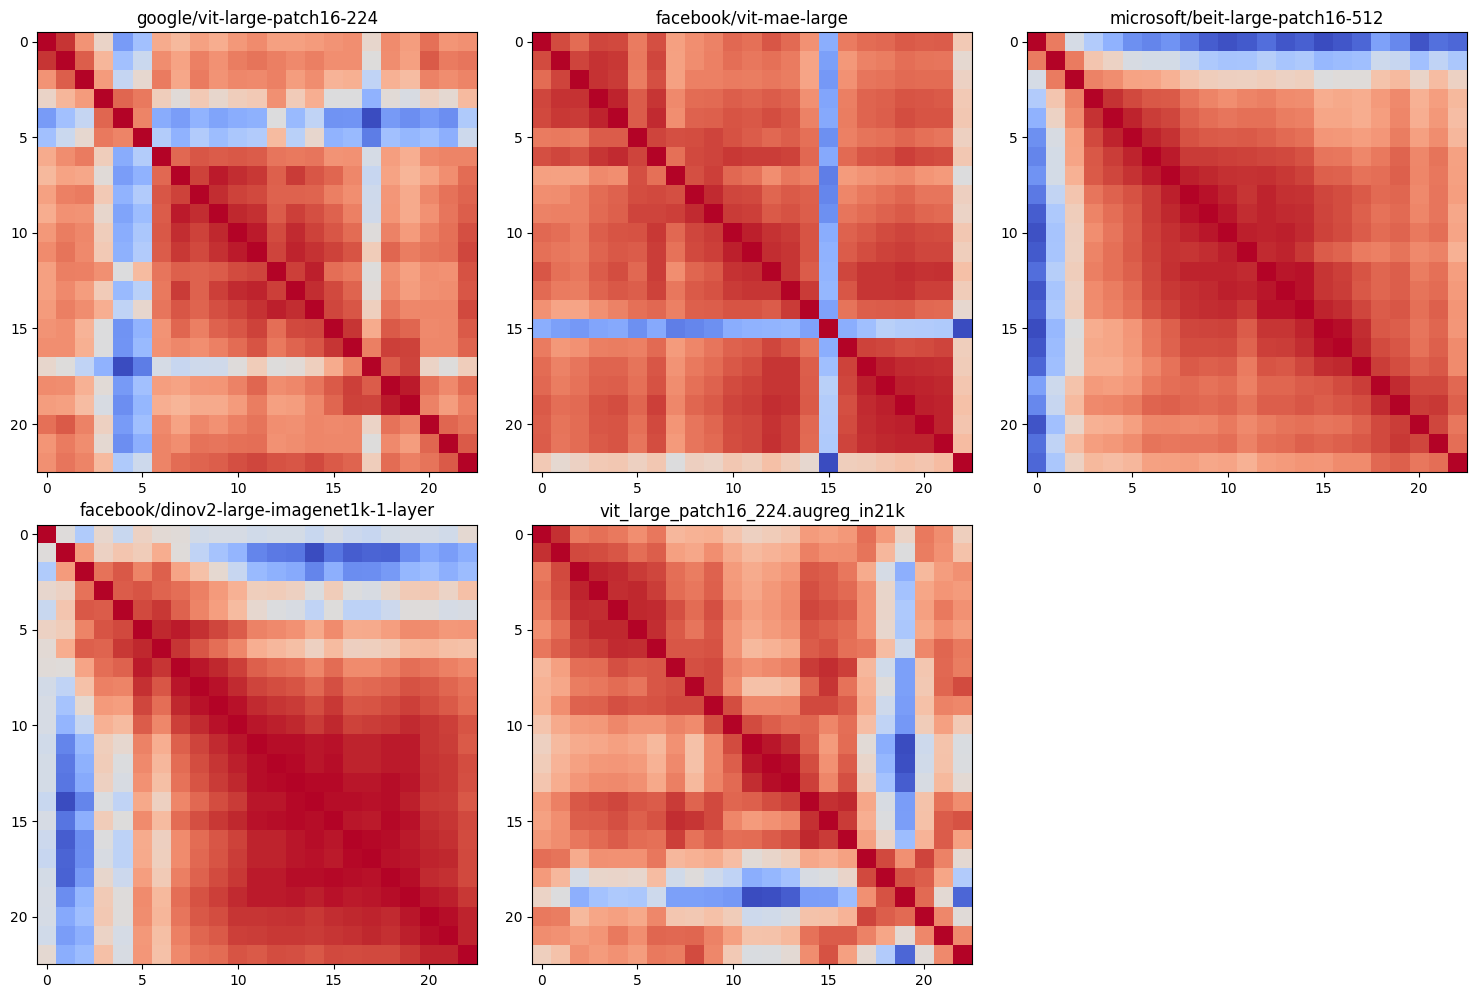

In [ ]:
# plot
model_names = ["google/vit-large-patch16-224",
              "facebook/vit-mae-large", "microsoft/beit-large-patch16-512", 'facebook/dinov2-large-imagenet1k-1-layer', "vit_large_patch16_224.augreg_in21k"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2x2 grid of subplots

# Flatten axes for easy iteration
axes = axes.flatten()


# Plot heatmaps
for i in range(5):
  ax = axes[i]
  im = ax.imshow(cka_similarities[i], cmap='coolwarm')
  model_name = model_names[i]
  ax.set_title(model_name)

axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Plot heatmaps
#for i, ax in enumerate(axes):
#    sns.heatmap(cka_similarities[i],
#                ax=ax,
                #xticklabels=layers_to_analyze,
                #yticklabels=layers_to_analyze,
#                cmap='coolwarm', annot=False)
#    model_name = model_names[i]
#    ax.set_title(model_name)

#axes[-1].axis('off')

# Adjust layout
#plt.tight_layout()
#plt.show()

compute the correlation between the 5 heatmaps to quantify their similarity.

In [ ]:
from itertools import product
from scipy.stats import spearmanr
from sklearn.metrics.pairwise import cosine_similarity

def compute_correlation(matrix1, matrix2):
    vec1 = matrix1.flatten()
    vec2 = matrix2.flatten()
    return np.corrcoef(vec1, vec2)[0, 1]

def compute_pearson(matrix1, matrix2):
    vec1 = matrix1.flatten()
    vec2 = matrix2.flatten()
    spearman_corr, _ = spearmanr(vec1, vec2)
    return spearman_corr

def compute_cosine(matrix1, matrix2):
    vec1 = matrix1.flatten()
    vec2 = matrix2.flatten()
    cosine_sim = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0, 0]
    return cosine_sim

# Store pairwise results
corr_matrix = np.zeros((len(cka_similarities), len(cka_similarities)))
pear_matrix = np.zeros((len(cka_similarities), len(cka_similarities)))
cosine_matrix = np.zeros((len(cka_similarities), len(cka_similarities)))

# Fill the matrix with pairwise correlations
for i, j in product(range(len(cka_similarities)), repeat=2):
    corr_matrix[i, j] = compute_correlation(cka_similarities[i], cka_similarities[j])
    pear_matrix[i, j] = compute_pearson(cka_similarities[i], cka_similarities[j])
    cosine_matrix[i, j] = compute_cosine(cka_similarities[i], cka_similarities[j])

# Convert to a DataFrame for readability
corr_df = pd.DataFrame(corr_matrix, columns=model_names,
                       index=model_names)

pear_df = pd.DataFrame(pear_matrix, columns=model_names,
                       index=model_names)

cosine_df = pd.DataFrame(cosine_matrix, columns=model_names,
                       index=model_names)





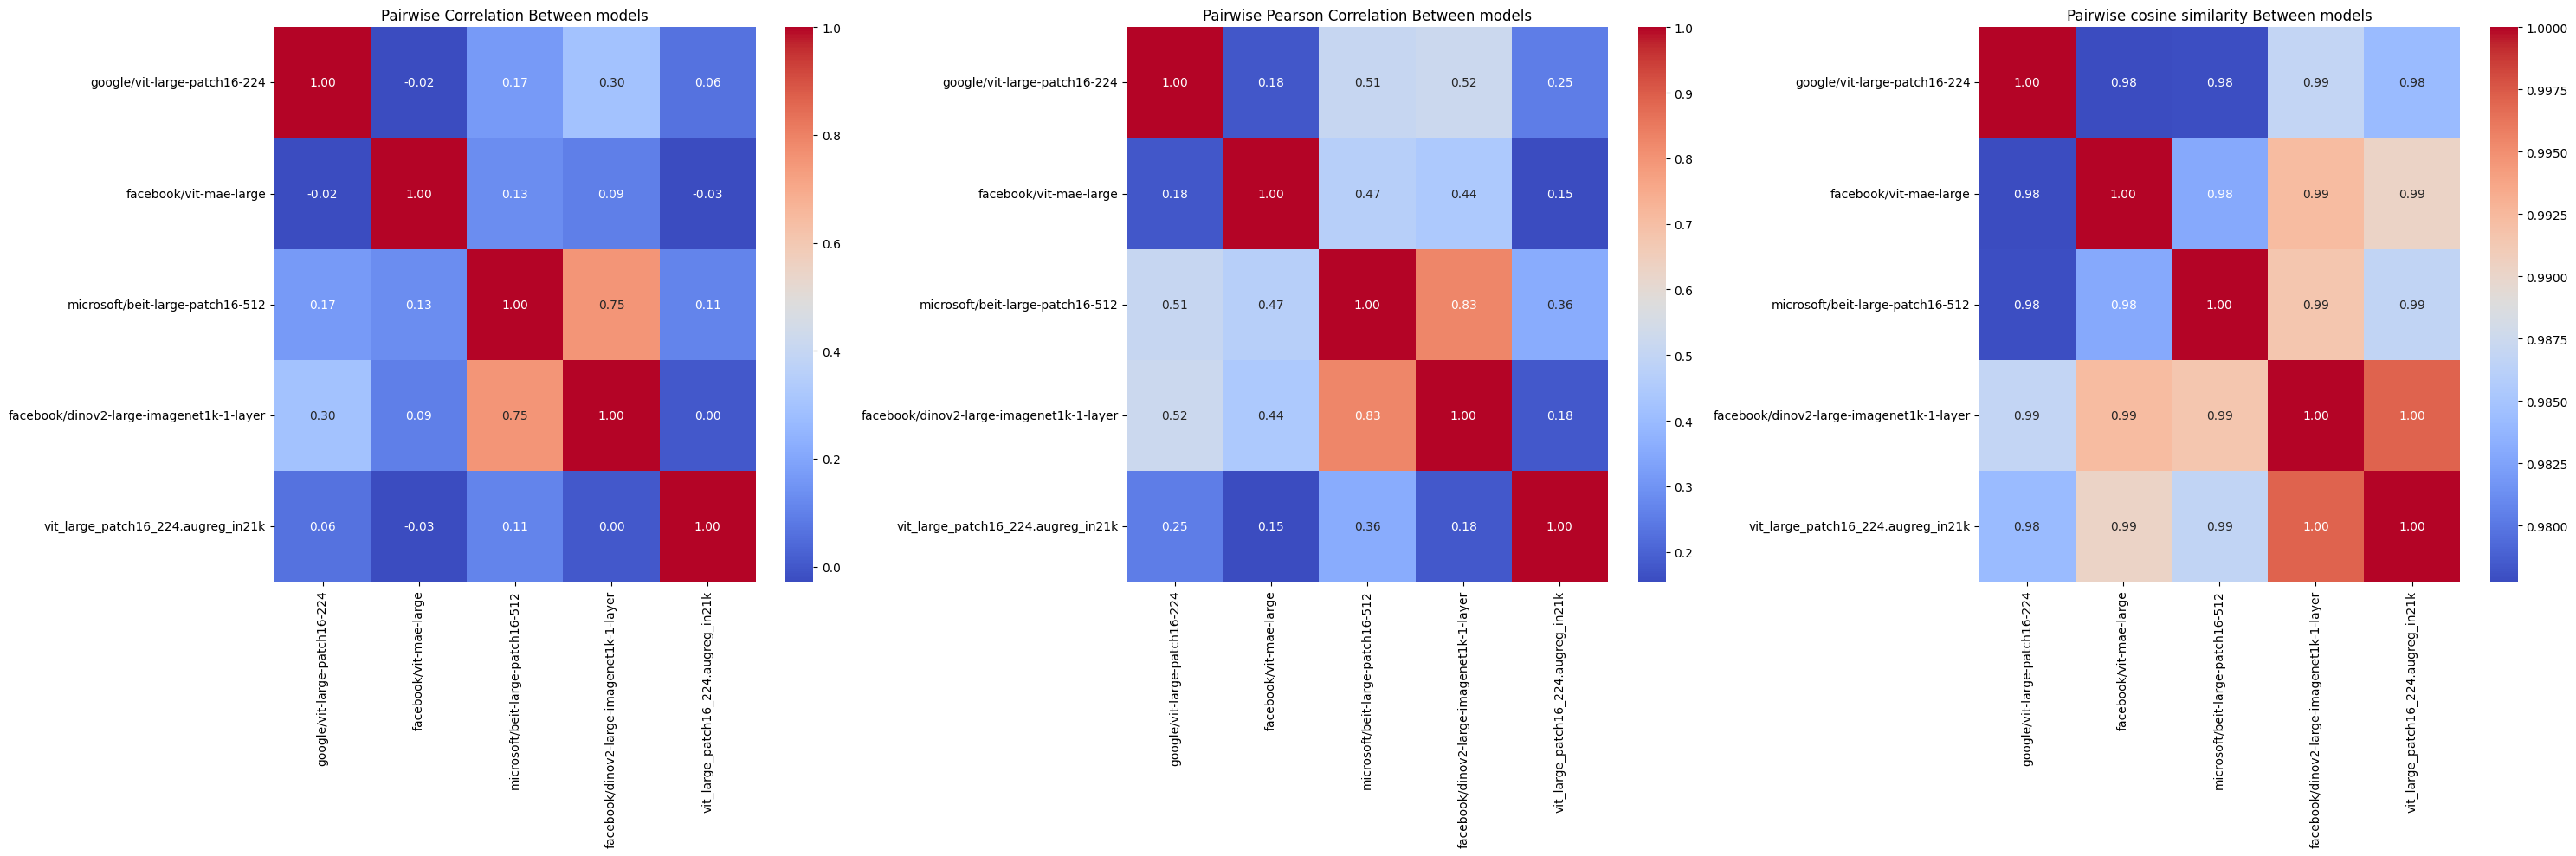

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first heatmap
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", ax=axs[0])
axs[0].set_title("Pairwise Correlation Between models")

# Plot the second heatmap
sns.heatmap(pear_df, annot=True, cmap="coolwarm", fmt=".2f", ax=axs[1])
axs[1].set_title("Pairwise Pearson Correlation Between models")

# Plot the third heatmap
sns.heatmap(cosine_df, annot=True, cmap="coolwarm", fmt=".2f", ax=axs[2])
axs[2].set_title("Pairwise cosine similarity Between models")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

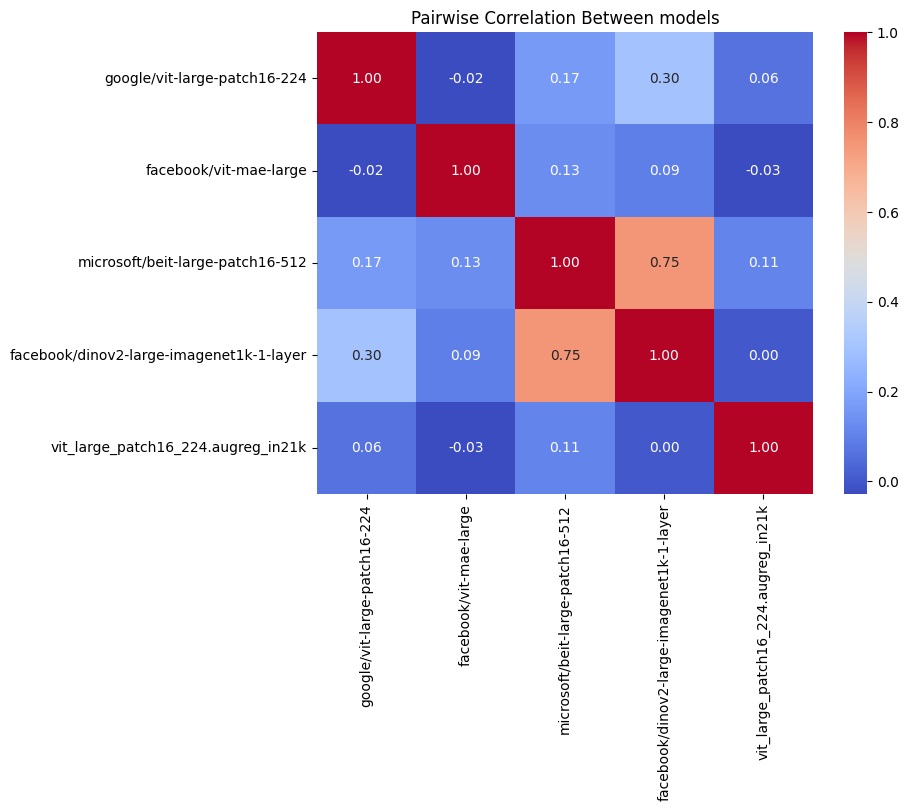

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Correlation Between models")
plt.show()

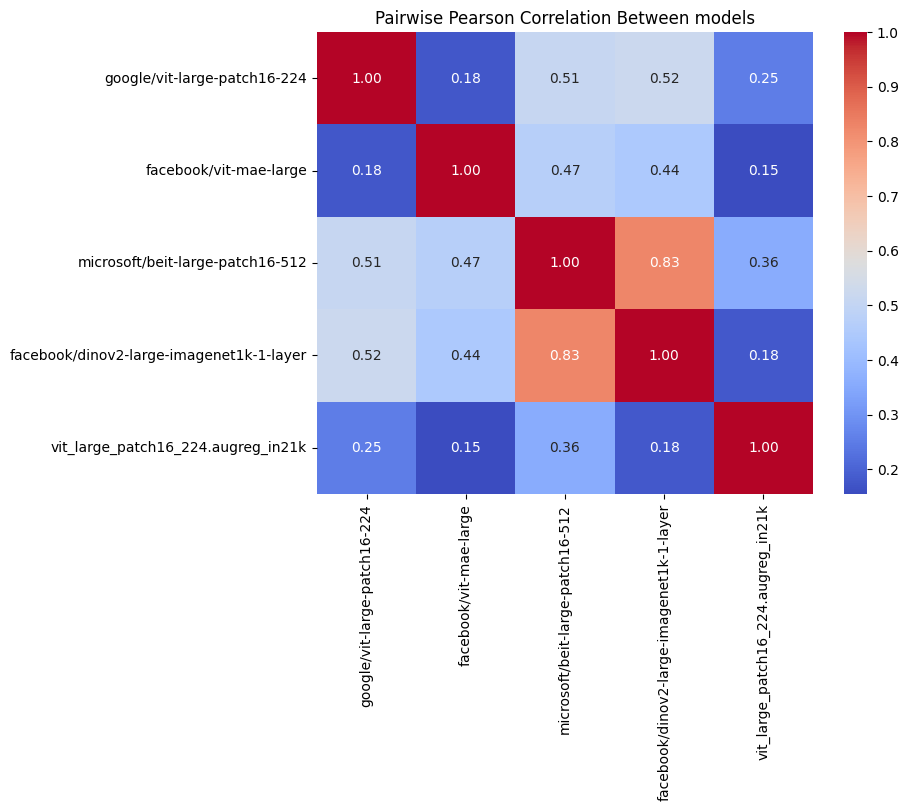

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pear_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise Pearson Correlation Between models")
plt.show()

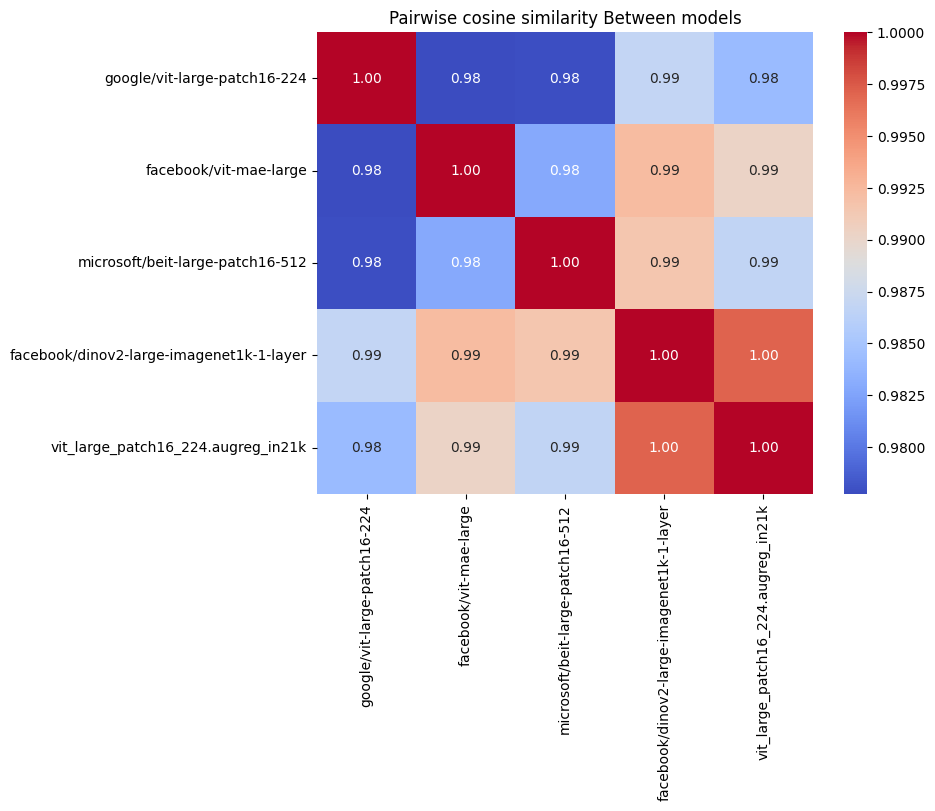

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pairwise cosine similarity Between models")
plt.show()